In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\sarav\Documents\EDA\datasets\eurusd\eurusd_m5.csv")

In [3]:
del df['Unnamed: 0']
del df['tick_volume']
del df['spread']

In [4]:
df_original = df

del df['open']
del df['high']
del df['low']

In [5]:
df['SMA10'] = df['close'].rolling(10).mean()
df['SMA20'] = df['close'].rolling(20).mean()

In [6]:
df.isna().sum()

time            0
close           0
real_volume     0
SMA10           9
SMA20          19
dtype: int64

In [7]:
df['SMA10'].head(20)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     1.294531
10    1.294514
11    1.294489
12    1.294452
13    1.294384
14    1.294313
15    1.294323
16    1.294248
17    1.294202
18    1.294209
19    1.294234
Name: SMA10, dtype: float64

In [8]:
df['SMA20'].head(30)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19    1.294382
20    1.294389
21    1.294387
22    1.294391
23    1.294340
24    1.294300
25    1.294313
26    1.294275
27    1.294256
28    1.294264
29    1.294282
Name: SMA20, dtype: float64

In [9]:
df

,time,close,real_volume,SMA10,SMA20
0,2012-01-02 00:00:00,1.29448,0,NaN,NaN
1,2012-01-02 00:05:00,1.29454,0,NaN,NaN
2,2012-01-02 00:10:00,1.29459,0,NaN,NaN
3,2012-01-02 00:15:00,1.29512,0,NaN,NaN
4,2012-01-02 00:20:00,1.29500,0,NaN,NaN
...,...,...,...,...,...
740393,2021-12-30 23:40:00,1.13250,0,1.132519,1.132442
740394,2021-12-30 23:45:00,1.13257,0,1.132583,1.132437
740395,2021-12-30 23:50:00,1.13248,0,1.132591,1.132435
740396,2021-12-30 23:55:00,1.13257,0,1.132584,1.132433


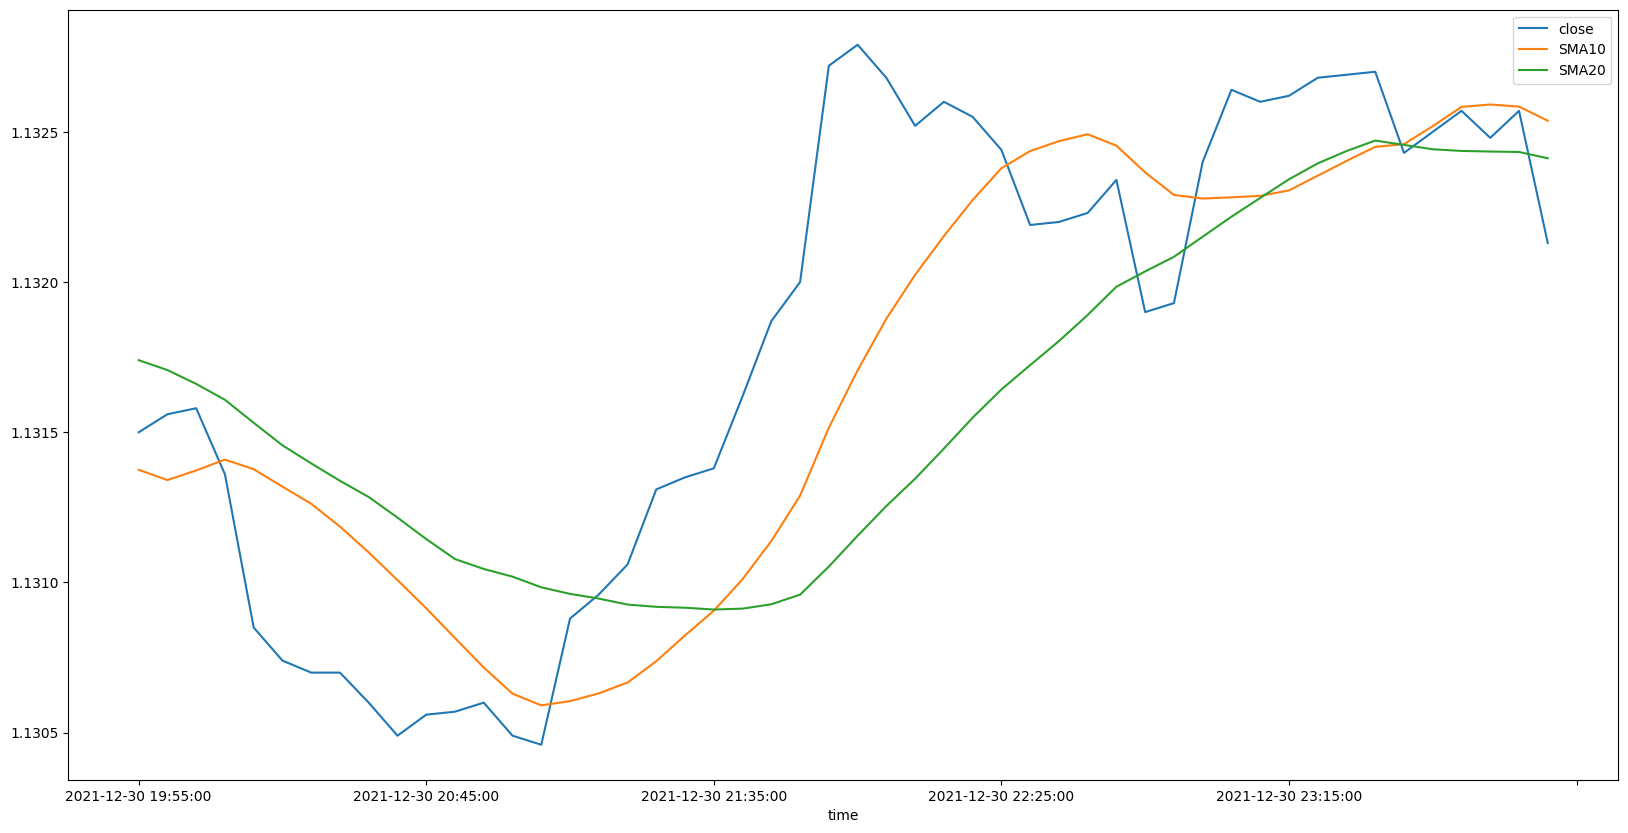

In [10]:
df[['close','SMA10','SMA20','time']].tail(50).plot(figsize=(20,10),x='time')
plt.show()

In [11]:
def signal(raw):
    
    if raw['SMA10'] > raw['SMA20']:
        return 1
    elif raw['SMA10']  < raw['SMA20']:
        return 0
    else :
        return np.NaN

df['Signal'] = df.apply(signal,axis=1)

In [12]:
df['Signal'].value_counts()

1.0    370986
0.0    368937
Name: Signal, dtype: int64

In [13]:
df['Signal-Filtered'] = df['Signal'][df['Signal'] != df['Signal'].shift()]

In [14]:
df['Signal-Price(BUY)'] = df['close'][df['Signal-Filtered'] == 1]
df['Signal-Price(SELL)'] = df['close'][df['Signal-Filtered'] == 0]

In [15]:
df.tail(50)

,time,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL)
740348,2021-12-30 19:55:00,1.13150,0,1.131375,1.131740,0.0,NaN,NaN,NaN
740349,2021-12-30 20:00:00,1.13156,0,1.131341,1.131707,0.0,NaN,NaN,NaN
740350,2021-12-30 20:05:00,1.13158,0,1.131373,1.131661,0.0,NaN,NaN,NaN
740351,2021-12-30 20:10:00,1.13136,0,1.131409,1.131608,0.0,NaN,NaN,NaN
740352,2021-12-30 20:15:00,1.13085,0,1.131377,1.131531,0.0,NaN,NaN,NaN
740353,2021-12-30 20:20:00,1.13074,0,1.131319,1.131456,0.0,NaN,NaN,NaN
740354,2021-12-30 20:25:00,1.13070,0,1.131262,1.131396,0.0,NaN,NaN,NaN
740355,2021-12-30 20:30:00,1.13070,0,1.131186,1.131339,0.0,NaN,NaN,NaN
740356,2021-12-30 20:35:00,1.13060,0,1.131100,1.131285,0.0,NaN,NaN,NaN
740357,2021-12-30 20:40:00,1.13049,0,1.131008,1.131216,0.0,NaN,NaN,NaN


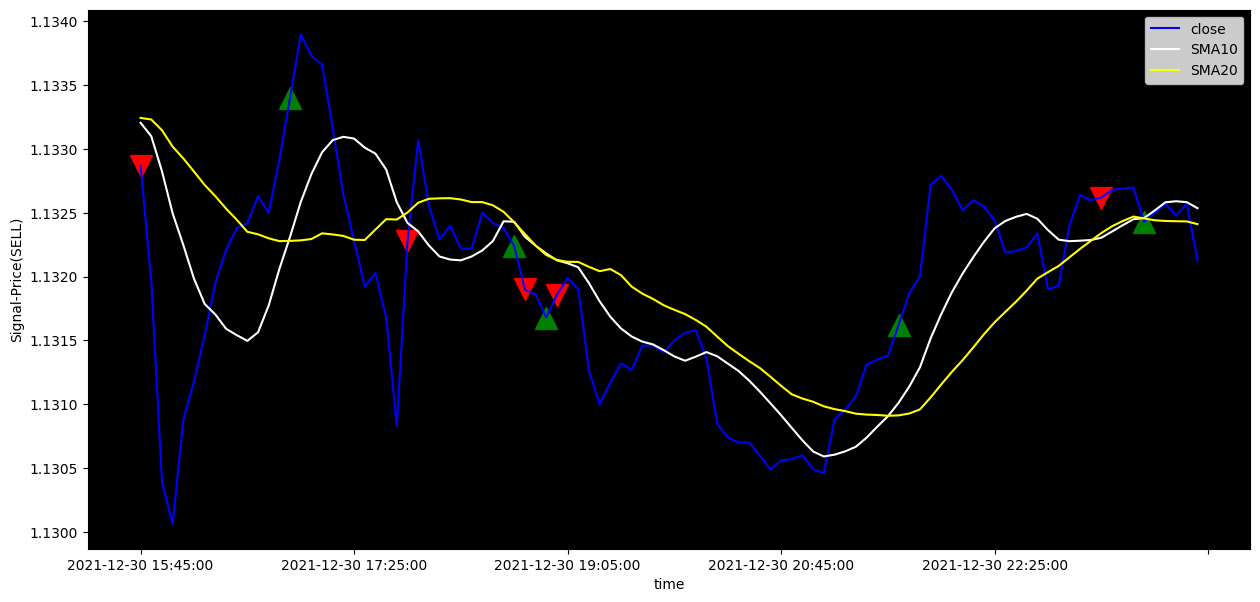

In [16]:
ax = df[['close','SMA10','SMA20','time']].tail(100).plot(x='time',legend=True,figsize=(15, 7),color=['blue','white','yellow'])
df[['time','Signal-Price(BUY)']].tail(100).plot(x='time',y='Signal-Price(BUY)',kind='scatter',ax=ax,marker='^',secondary_y=True,color='green',legend='True',s=250)
df[['time','Signal-Price(SELL)']].tail(100).plot(x='time',y='Signal-Price(SELL)',kind='scatter',ax=ax,marker='v',secondary_y=True,color='red',legend='True',s=250)
ax.set_facecolor('black')
plt.show()

In [17]:
df.tail(50)

,time,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL)
740348,2021-12-30 19:55:00,1.13150,0,1.131375,1.131740,0.0,NaN,NaN,NaN
740349,2021-12-30 20:00:00,1.13156,0,1.131341,1.131707,0.0,NaN,NaN,NaN
740350,2021-12-30 20:05:00,1.13158,0,1.131373,1.131661,0.0,NaN,NaN,NaN
740351,2021-12-30 20:10:00,1.13136,0,1.131409,1.131608,0.0,NaN,NaN,NaN
740352,2021-12-30 20:15:00,1.13085,0,1.131377,1.131531,0.0,NaN,NaN,NaN
740353,2021-12-30 20:20:00,1.13074,0,1.131319,1.131456,0.0,NaN,NaN,NaN
740354,2021-12-30 20:25:00,1.13070,0,1.131262,1.131396,0.0,NaN,NaN,NaN
740355,2021-12-30 20:30:00,1.13070,0,1.131186,1.131339,0.0,NaN,NaN,NaN
740356,2021-12-30 20:35:00,1.13060,0,1.131100,1.131285,0.0,NaN,NaN,NaN
740357,2021-12-30 20:40:00,1.13049,0,1.131008,1.131216,0.0,NaN,NaN,NaN


In [18]:
# x = df.index()
# while x != 0 :
#     x = x-1

df['Profit'] = np.NaN

In [19]:
initial_balance = np.NaN
for index, row in df.iterrows():
    if row['Signal-Filtered'] == 1:  # Buy signal
        if initial_balance is not None:
            profit = initial_balance - row['close']
            df.at[index, 'Profit'] = profit
        initial_balance = row['close']
    elif row['Signal-Filtered'] == 0:  # Sell signal
        if initial_balance is not None:
            profit = row['close'] - initial_balance
            df.at[index, 'Profit'] = profit
        initial_balance = row['close']

In [20]:
df[(df['Signal-Filtered'] == 1) | (df['Signal-Filtered'] ==  0)]

,time,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL),Profit
19,2012-01-02 01:35:00,1.29411,0,1.294234,1.294382,0.0,0.0,NaN,1.29411,NaN
26,2012-01-02 02:10:00,1.29410,0,1.294303,1.294275,1.0,1.0,1.29410,NaN,0.00001
31,2012-01-02 02:35:00,1.29430,0,1.294273,1.294280,0.0,0.0,NaN,1.29430,0.00020
77,2012-01-02 06:25:00,1.29328,0,1.292517,1.292480,1.0,1.0,1.29328,NaN,0.00102
140,2012-01-02 11:40:00,1.29399,0,1.295130,1.295219,0.0,0.0,NaN,1.29399,0.00071
...,...,...,...,...,...,...,...,...,...,...
740336,2021-12-30 18:55:00,1.13168,0,1.132182,1.132170,1.0,1.0,1.13168,NaN,0.00022
740337,2021-12-30 19:00:00,1.13186,0,1.132128,1.132131,0.0,0.0,NaN,1.13186,0.00018
740369,2021-12-30 21:40:00,1.13162,0,1.131011,1.130913,1.0,1.0,1.13162,NaN,0.00024
740388,2021-12-30 23:15:00,1.13262,0,1.132305,1.132342,0.0,0.0,NaN,1.13262,0.00100


In [21]:
df['Category'] = df['Profit'].apply(lambda x: 'Profit' if x > 0 else ('Loss' if x < 0 else np.NaN))

In [22]:
df[((df['Signal-Filtered'] == 1) | (df['Signal-Filtered'] ==  0)) & (df['Category'] == 'Profit')]

,time,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL),Profit,Category
26,2012-01-02 02:10:00,1.29410,0,1.294303,1.294275,1.0,1.0,1.29410,NaN,0.00001,Profit
31,2012-01-02 02:35:00,1.29430,0,1.294273,1.294280,0.0,0.0,NaN,1.29430,0.00020,Profit
77,2012-01-02 06:25:00,1.29328,0,1.292517,1.292480,1.0,1.0,1.29328,NaN,0.00102,Profit
140,2012-01-02 11:40:00,1.29399,0,1.295130,1.295219,0.0,0.0,NaN,1.29399,0.00071,Profit
192,2012-01-02 16:00:00,1.29315,0,1.293182,1.293160,1.0,1.0,1.29315,NaN,0.00134,Profit
...,...,...,...,...,...,...,...,...,...,...,...
740336,2021-12-30 18:55:00,1.13168,0,1.132182,1.132170,1.0,1.0,1.13168,NaN,0.00022,Profit
740337,2021-12-30 19:00:00,1.13186,0,1.132128,1.132131,0.0,0.0,NaN,1.13186,0.00018,Profit
740369,2021-12-30 21:40:00,1.13162,0,1.131011,1.130913,1.0,1.0,1.13162,NaN,0.00024,Profit
740388,2021-12-30 23:15:00,1.13262,0,1.132305,1.132342,0.0,0.0,NaN,1.13262,0.00100,Profit


In [23]:
df.tail(50)

,time,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL),Profit,Category
740348,2021-12-30 19:55:00,1.13150,0,1.131375,1.131740,0.0,NaN,NaN,NaN,NaN,NaN
740349,2021-12-30 20:00:00,1.13156,0,1.131341,1.131707,0.0,NaN,NaN,NaN,NaN,NaN
740350,2021-12-30 20:05:00,1.13158,0,1.131373,1.131661,0.0,NaN,NaN,NaN,NaN,NaN
740351,2021-12-30 20:10:00,1.13136,0,1.131409,1.131608,0.0,NaN,NaN,NaN,NaN,NaN
740352,2021-12-30 20:15:00,1.13085,0,1.131377,1.131531,0.0,NaN,NaN,NaN,NaN,NaN
740353,2021-12-30 20:20:00,1.13074,0,1.131319,1.131456,0.0,NaN,NaN,NaN,NaN,NaN
740354,2021-12-30 20:25:00,1.13070,0,1.131262,1.131396,0.0,NaN,NaN,NaN,NaN,NaN
740355,2021-12-30 20:30:00,1.13070,0,1.131186,1.131339,0.0,NaN,NaN,NaN,NaN,NaN
740356,2021-12-30 20:35:00,1.13060,0,1.131100,1.131285,0.0,NaN,NaN,NaN,NaN,NaN
740357,2021-12-30 20:40:00,1.13049,0,1.131008,1.131216,0.0,NaN,NaN,NaN,NaN,NaN


In [24]:
df['Filter-by-profit(BUY)'] = df['Signal-Price(BUY)'][df['Category'] == 'Profit']
df['Filter-by-profit(SELL)'] = df['Signal-Price(SELL)'][df['Category'] == 'Profit']